In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from utils.trsm import training_6j

In [3]:
import numpy as np
import awkward as ak
import uproot as up
from utils.trsm import Tree

In [4]:
train_file = '../../NMSSM_XYH_YToHH_6b_MX_700_MY_400_6jet_training_set.root'

In [15]:
train = training_6j(train_file)

[[0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 1 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 1 0]]


SystemExit: 

In [16]:
import vector

In [18]:
def build_p4(pt, eta, phi, m):
    return vector.obj(pt=pt, eta=eta, phi=phi, m=m)

In [20]:
tree = Tree(train_file, 'sixBtree', as_ak=True)
# sort_mask = ak.argsort(tree.jet_pt, axis=1)[:,::-1]
# tree.sort(sort_mask)
nevents = len(tree.jet_pt)

n_sixb = tree.n_sixb
local_ind = ak.local_index(tree.jet_idx)
signal_jet_mask = tree.jet_idx > -1
signal_jet_ind  = local_ind[signal_jet_mask]
excess_jet_ind  = local_ind[~signal_jet_mask]

mixed_ind = ak.sort(ak.concatenate((excess_jet_ind, signal_jet_ind), axis=1)[:, :6], axis=1)
mixed_ind_np = mixed_ind.to_numpy()

signal_p4 = vector.obj(
    pt  = tree.jet_pt[signal_jet_mask],
    eta = tree.jet_eta[signal_jet_mask],
    phi = tree.jet_phi[signal_jet_mask],
    m   = tree.jet_m[signal_jet_mask]
)

excess_p4 = vector.obj(
    pt  = tree.jet_pt[mixed_ind],
    eta = tree.jet_eta[mixed_ind],
    phi = tree.jet_phi[mixed_ind],
    m   = tree.jet_m[mixed_ind]
)

signal_btag = tree.jet_btag[signal_jet_mask].to_numpy()
excess_btag = tree.jet_btag[mixed_ind].to_numpy()

ind_array = signal_jet_mask
jet0_p4s = build_p4(tree.jet_pt[ind_array][:,0], 
                   tree.jet_eta[ind_array][:,0], 
                   tree.jet_phi[ind_array][:,0], 
                   tree.jet_m[ind_array][:,0])
jet1_p4s = build_p4(tree.jet_pt[ind_array][:,1], 
                   tree.jet_eta[ind_array][:,1], 
                   tree.jet_phi[ind_array][:,1], 
                   tree.jet_m[ind_array][:,1])
jet2_p4s = build_p4(tree.jet_pt[ind_array][:,2], 
                   tree.jet_eta[ind_array][:,2], 
                   tree.jet_phi[ind_array][:,2], 
                   tree.jet_m[ind_array][:,2])
jet3_p4s = build_p4(tree.jet_pt[ind_array][:,3], 
                   tree.jet_eta[ind_array][:,3], 
                   tree.jet_phi[ind_array][:,3], 
                   tree.jet_m[ind_array][:,3])
jet4_p4s = build_p4(tree.jet_pt[ind_array][:,4], 
                   tree.jet_eta[ind_array][:,4], 
                   tree.jet_phi[ind_array][:,4], 
                   tree.jet_m[ind_array][:,4])
jet5_p4s = build_p4(tree.jet_pt[ind_array][:,5], 
                   tree.jet_eta[ind_array][:,5], 
                   tree.jet_phi[ind_array][:,5], 
                   tree.jet_m[ind_array][:,5])

ind_array = mixed_ind
jet0_p4e = build_p4(tree.jet_pt[ind_array][:,0], 
                   tree.jet_eta[ind_array][:,0], 
                   tree.jet_phi[ind_array][:,0], 
                   tree.jet_m[ind_array][:,0])
jet1_p4e = build_p4(tree.jet_pt[ind_array][:,1], 
                   tree.jet_eta[ind_array][:,1], 
                   tree.jet_phi[ind_array][:,1], 
                   tree.jet_m[ind_array][:,1])
jet2_p4e = build_p4(tree.jet_pt[ind_array][:,2], 
                   tree.jet_eta[ind_array][:,2], 
                   tree.jet_phi[ind_array][:,2], 
                   tree.jet_m[ind_array][:,2])
jet3_p4e = build_p4(tree.jet_pt[ind_array][:,3], 
                   tree.jet_eta[ind_array][:,3], 
                   tree.jet_phi[ind_array][:,3], 
                   tree.jet_m[ind_array][:,3])
jet4_p4e = build_p4(tree.jet_pt[ind_array][:,4], 
                   tree.jet_eta[ind_array][:,4], 
                   tree.jet_phi[ind_array][:,4], 
                   tree.jet_m[ind_array][:,4])
jet5_p4e = build_p4(tree.jet_pt[ind_array][:,5], 
                   tree.jet_eta[ind_array][:,5], 
                   tree.jet_phi[ind_array][:,5], 
                   tree.jet_m[ind_array][:,5])

jet6_p4s = jet0_p4s + jet1_p4s + jet2_p4s + jet3_p4s + jet4_p4s + jet5_p4s
jet6_p4e = jet0_p4e + jet1_p4e + jet2_p4e + jet3_p4e + jet4_p4e + jet5_p4e

In [44]:
ak.from_numpy(np.repeat(tree.jet_pt[:,np.newaxis].to_numpy(), 7, axis=1))

ValueError: in ListOffsetArray64, cannot convert to RegularArray because subarray lengths are not regular

(https://github.com/scikit-hep/awkward-1.0/blob/1.3.0/src/cpu-kernels/awkward_ListOffsetArray_toRegularArray.cpp#L22)

In [36]:
jet0_p4s.pt.to_numpy()[np.isnan(jet1_p4s.boost_p4(jet6_p4s).pt.to_numpy())]

array([ 224.682,  142.267,  170.098], dtype=float32)

In [26]:
jet1_p4s.pt.to_numpy()[np.isnan(jet1_p4s.boost_p4(jet6_p4s).pt.to_numpy())]

array([ 191.246,  128.518,  123.038], dtype=float32)

In [30]:
jet2_p4s.pt.to_numpy()[np.isnan(jet2_p4s.boost_p4(jet6_p4s).pt.to_numpy())]

array([ 70.462,  125.113,  70.541], dtype=float32)

In [31]:
jet3_p4s.pt.to_numpy()[np.isnan(jet3_p4s.boost_p4(jet6_p4s).pt.to_numpy())]

array([ 66.934,  119.309,  54.290], dtype=float32)

In [33]:
jet4_p4s.pt.to_numpy()[np.isnan(jet3_p4s.boost_p4(jet6_p4s).pt.to_numpy())]

array([ 62.481,  105.234,  50.219], dtype=float32)

In [35]:
jet5_p4s.pt.to_numpy()[np.isnan(jet3_p4s.boost_p4(jet6_p4s).pt.to_numpy())]

array([ 52.849,  27.711,  48.905], dtype=float32)

In [32]:
signal_btag[:,0][np.isnan(jet3_p4s.boost_p4(jet6_p4s).pt.to_numpy())]

array([ 0.848,  0.999,  0.945], dtype=float32)

In [37]:
jet0_p4s.eta.to_numpy()[np.isnan(jet1_p4s.boost_p4(jet6_p4s).pt.to_numpy())]

array([-1.139,  1.451, -0.584], dtype=float32)

In [38]:
jet0_p4s.phi.to_numpy()[np.isnan(jet1_p4s.boost_p4(jet6_p4s).pt.to_numpy())]

array([ 1.674,  2.799, -2.188], dtype=float32)

In [39]:
jet0_p4s.mass.to_numpy()[np.isnan(jet1_p4s.boost_p4(jet6_p4s).pt.to_numpy())]

array([ 35.879,  22.162,  17.772], dtype=float32)

In [42]:
jet6_p4s.eta.to_numpy()[np.isnan(jet1_p4s.boost_p4(jet6_p4s).pt.to_numpy())]

array([-0.973,  340282346638528859811704183484516925440.000, -0.945],
      dtype=float32)

In [103]:
tree = Tree(train_file, 'sixBtree', as_ak=True)

In [133]:
np.isnan(tree.jet_pt[tree.jet_idx == 0].to_numpy()).reshape(N).sum()

0

In [124]:
tree.gen_HX_b1_recojet_ptRegressed.to_numpy()

NameError: name 'nan' is not defined

In [106]:
tree.jet_idx[ak.argsort(tree.jet_pt[:,::-1], axis=1)]

<Array [[-1, 2, 3, -1, 0, ... 0, 4, 5, 3, -1]] type='665714 * var * int32'>

In [104]:
tree.sort(ak.argsort(tree.jet_pt, axis=1))

In [107]:
tree.jet_idx[0]

<Array [-1, 1, 4, 5, 0, -1, 3, 2, -1] type='9 * int32'>

In [ ]:
tree.jet_idx

In [79]:
signal_pt = tree.jet_pt[tree.jet_idx > -1]
signal_eta = tree.jet_eta[tree.jet_idx > -1]
signal_phi = tree.jet_phi[tree.jet_idx > -1]
signal_btag = tree.jet_btag[tree.jet_idx > -1]

In [83]:
signal_btag[:5,:].to_numpy()

array([[ 0.952,  0.935,  0.893,  0.923,  0.469,  0.275],
       [ 1.000,  0.992,  0.778,  0.981,  0.603,  0.604],
       [ 0.883,  0.999,  0.842,  0.974,  1.000,  0.414],
       [ 0.794,  0.997,  0.985,  0.889,  0.487,  0.622],
       [ 0.922,  0.998,  0.852,  0.990,  0.306,  0.595]], dtype=float32)

In [59]:
train.signal_p4.pt.to_numpy().shape

(665714, 6)

In [7]:
train.excess_p4.rapidity

<Array [-0.192, 0.668, -0.73, ... -0.451, 0.23] type='665714 * float32'>

In [8]:
import matplotlib.pyplot as plt

In [34]:
n = int(len(train.features[:,4])/2)

In [13]:
len(train.signal_p4.rapidity.to_numpy())

665714

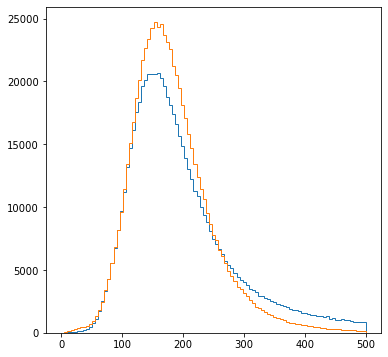

In [41]:
fig, ax = plt.subplots(figsize=(6,6))
ax.hist(train.features[:n,24], bins=np.linspace(0, 500, 100), histtype='step')
_ = ax.hist(train.features[n:,24], bins=np.linspace(0, 500, 100), histtype='step')

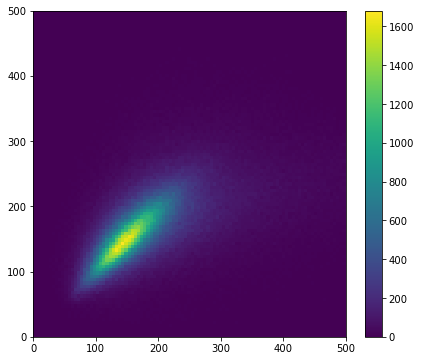

In [44]:
fig, ax = plt.subplots(figsize=(7,6))
nx, ny, edges, im = ax.hist2d(train.features[:n,24], train.features[n:,24], bins=(np.linspace(0,500,100), np.linspace(0,500,100)))
plt.colorbar(im)

In [52]:
a = np.array((1,2,3))[:,np.newaxis]

In [53]:
b = np.array((4,5,6))[:,np.newaxis]

In [54]:
np.concatenate((a,b), axis=1)

array([[1, 4],
       [2, 5],
       [3, 6]])

In [46]:
np.tile([1,0], 5).reshape(5,2)

array([[1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0]])